**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


## Import data

In [2]:
### set file path
fdiry = file.path(FD_RES, "source", "cCREs")
fname = "ENCFF971AHO_ENCFF847JMY_ENCFF779QTH_ENCFF405AYC.7group.bed"
fpath = file.path(fdiry, fname)

### import data
cnames = c("Chrom", "Start", "End", "Name", "Score", "Strand", "Value1", "Value2", "Value3", "Label1", "Label2")
dat_ccre = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat_ccre = dat_ccre %>% 
    dplyr::select(Chrom, Start, End, Name, Label1) %>% 
    dplyr::rename(Label = Label1) %>% 
    distinct

### show table
print(dim(dat_ccre))
head(dat_ccre)

[1] 926535      5


Chrom,Start,End,Name,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr1,181251,181601,EH38E1310153,DNase-only
chr1,190865,191071,EH38E1310154,Low-DNase
chr1,778562,778912,EH38E1310158,"PLS,CTCF-bound"
chr1,779086,779355,EH38E1310159,PLS
chr1,779727,780060,EH38E1310160,Low-DNase
chr1,790397,790626,EH38E1310162,Low-DNase


In [3]:
### set file path
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Ratio.MYC.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

### assign
dat_astarr_myc = dat
print(dim(dat))
head(dat)

[1] 6000603       7


Chrom,Start,End,Strand,Region,Input,Output
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
chr8,126735970,126735971,stranded_neg,MYC,0,0
chr8,126735970,126735971,stranded_pos,MYC,0,0
chr8,126735970,126735971,unstranded,MYC,0,0
chr8,126735971,126735972,stranded_neg,MYC,0,0
chr8,126735971,126735972,stranded_pos,MYC,0,0
chr8,126735971,126735972,unstranded,MYC,0,0


In [4]:
### set file path
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "coverage")
fname = "Tile_K562_hg38_20210130_Ratio.MYC.stranded_pos.perbase.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

### assign
dat_tmpra_myc = dat
print(dim(dat))
head(dat)

[1] 2000082       6


Chrom,Start,End,Input,Output,FC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr8,126735901,126735902,889,8270,9.302587
chr8,126735902,126735903,889,8270,9.302587
chr8,126735903,126735904,889,8270,9.302587
chr8,126735904,126735905,889,8270,9.302587
chr8,126735905,126735906,889,8270,9.302587
chr8,126735906,126735907,889,8270,9.302587


## visualize ASTARR

In [5]:
start  = 127600000
end    = 127700000

dat = dat_astarr_myc
dat = dat %>%
    dplyr::filter(Start >= start, End < end) %>%
    dplyr::filter(Strand == "unstranded")

### assign
dat_cov_astarr = dat
print(dim(dat))
head(dat)

[1] 99999     7


Chrom,Start,End,Strand,Region,Input,Output
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
chr8,127600000,127600001,unstranded,MYC,0.0001336797,3.85765e-05
chr8,127600001,127600002,unstranded,MYC,0.0001332158,3.85765e-05
chr8,127600002,127600003,unstranded,MYC,0.0001332158,3.85765e-05
chr8,127600003,127600004,unstranded,MYC,0.0001347628,3.85765e-05
chr8,127600004,127600005,unstranded,MYC,0.0001337883,3.85765e-05
chr8,127600005,127600006,unstranded,MYC,0.0001327052,3.85765e-05


In [6]:
dat_cov_astarr %>% dplyr::filter(Input != 0) %>% dim

[1] 99999     7

In [7]:
dat_cov_astarr %>% dplyr::filter(Output != 0) %>% dim

[1] 99927     7

In [8]:
dat = dat_cov_astarr
dat = dat %>% 
    dplyr::filter(Input  != 0) %>% 
    dplyr::filter(Output != 0) %>% 
    mutate(
        FC     = Output / Input,
        Log2FC = log2(Output / Input),
        pLog2FC_add01 = log2((Output+ 1)  / (Input+ 1)),
        pLog2FC_add10 = log2((Output+10)  / (Input+10)),
        
        pLog2FC_10neg1 = log2((Output+10^-1)   / (Input+10^-1)),
        pLog2FC_10neg2 = log2((Output+10^-2)   / (Input+10^-2)),
        pLog2FC_10neg3 = log2((Output+10^-3)   / (Input+10^-3)),
        pLog2FC_10neg4 = log2((Output+10^-4)   / (Input+10^-4)),
        pLog2FC_10neg5 = log2((Output+10^-5)   / (Input+10^-5))
    )

###
dat$FC_Z = (dat$FC - mean(dat$FC)) / sd(dat$FC)

### assign
dat_lfc_astarr = dat
print(dim(dat))
head(dat)

[1] 99927    17


Chrom,Start,End,Strand,Region,Input,Output,FC,Log2FC,pLog2FC_add01,pLog2FC_add10,pLog2FC_10neg1,pLog2FC_10neg2,pLog2FC_10neg3,pLog2FC_10neg4,pLog2FC_10neg5,FC_Z
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr8,127600000,127600001,unstranded,MYC,0.0001336797,3.85765e-05,0.2885740,-1.792987,-0.0001371931,-1.372038e-05,-0.001370869,-0.01360343,-0.1264056,-0.7538499,-1.564526,-1.098904
chr8,127600001,127600002,unstranded,MYC,0.0001332158,3.85765e-05,0.2895791,-1.787971,-0.0001365239,-1.365344e-05,-0.001364184,-0.01353738,-0.1258151,-0.7509827,-1.559860,-1.096587
chr8,127600002,127600003,unstranded,MYC,0.0001332158,3.85765e-05,0.2895791,-1.787971,-0.0001365239,-1.365344e-05,-0.001364184,-0.01353738,-0.1258151,-0.7509827,-1.559860,-1.096587
chr8,127600003,127600004,unstranded,MYC,0.0001347628,3.85765e-05,0.2862548,-1.804628,-0.0001387554,-1.387663e-05,-0.001386473,-0.01375762,-0.1277833,-0.7605211,-1.575360,-1.104251
chr8,127600004,127600005,unstranded,MYC,0.0001337883,3.85765e-05,0.2883399,-1.794158,-0.0001373498,-1.373604e-05,-0.001372433,-0.01361889,-0.1265438,-0.7545201,-1.565616,-1.099444
chr8,127600005,127600006,unstranded,MYC,0.0001327052,3.85765e-05,0.2906931,-1.782431,-0.0001357874,-1.357979e-05,-0.001356829,-0.01346469,-0.1251650,-0.7478211,-1.554708,-1.094018


In [9]:
mycolors = c(
    "#8dd3c7", #01
    "#ffffb3", #02
    "#bebada", #03
    "#fb8072", #04
    "#80b1d3", #05
    "#fdb462", #06
    "#b3de69", #07
    "#fccde5", #08
    "#d9d9d9", #09
    "#bc80bd", #10
    "#ccebc5", #11
    "#ffed6f", #12
    "#1f78b4",
    "#b2df8a",
    "#33a02c",
    "#fb9a99",
    "#e31a1c",
    "#ff7f00",
    "#cab2d6",
    "#6a3d9a",
    "#b15928")

In [10]:
### get ccre at around GATA1 gene
dat_ann = dat_ccre %>% dplyr::filter(Chrom == "chr8", Start >= start, End < end)

### add color
#dat_ann$Color = tol21rainbow
#dat_ann$Color = mycolors

### show table
print(dim(dat_ann))
head(dat_ann)

[1] 52  5


Chrom,Start,End,Name,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr8,127600158,127600345,EH38E2666058,Low-DNase
chr8,127603582,127603781,EH38E2666059,Low-DNase
chr8,127614674,127615023,EH38E2666061,Low-DNase
chr8,127617977,127618313,EH38E2666064,Low-DNase
chr8,127618434,127618781,EH38E2666065,Low-DNase
chr8,127618849,127619158,EH38E2666066,Low-DNase


In [11]:
dat_cov = dat_cov_astarr
dat_lfc = dat_lfc_astarr
gp1 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=FC))
gp4 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=Log2FC))
gp5 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=pLog2FC_add01))

lst = list(gp1, gp2, gp3, gp4, gp5)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = "red",
            alpha=0.3) +
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

lst[[1]] = lst[[1]] + labs(title="ATAC-STARR Chr8:127,600,000-127,700,000")
lst[[5]] = lst[[5]] + labs(y = "PseudoLog2FC\n(pcount=1.0)")

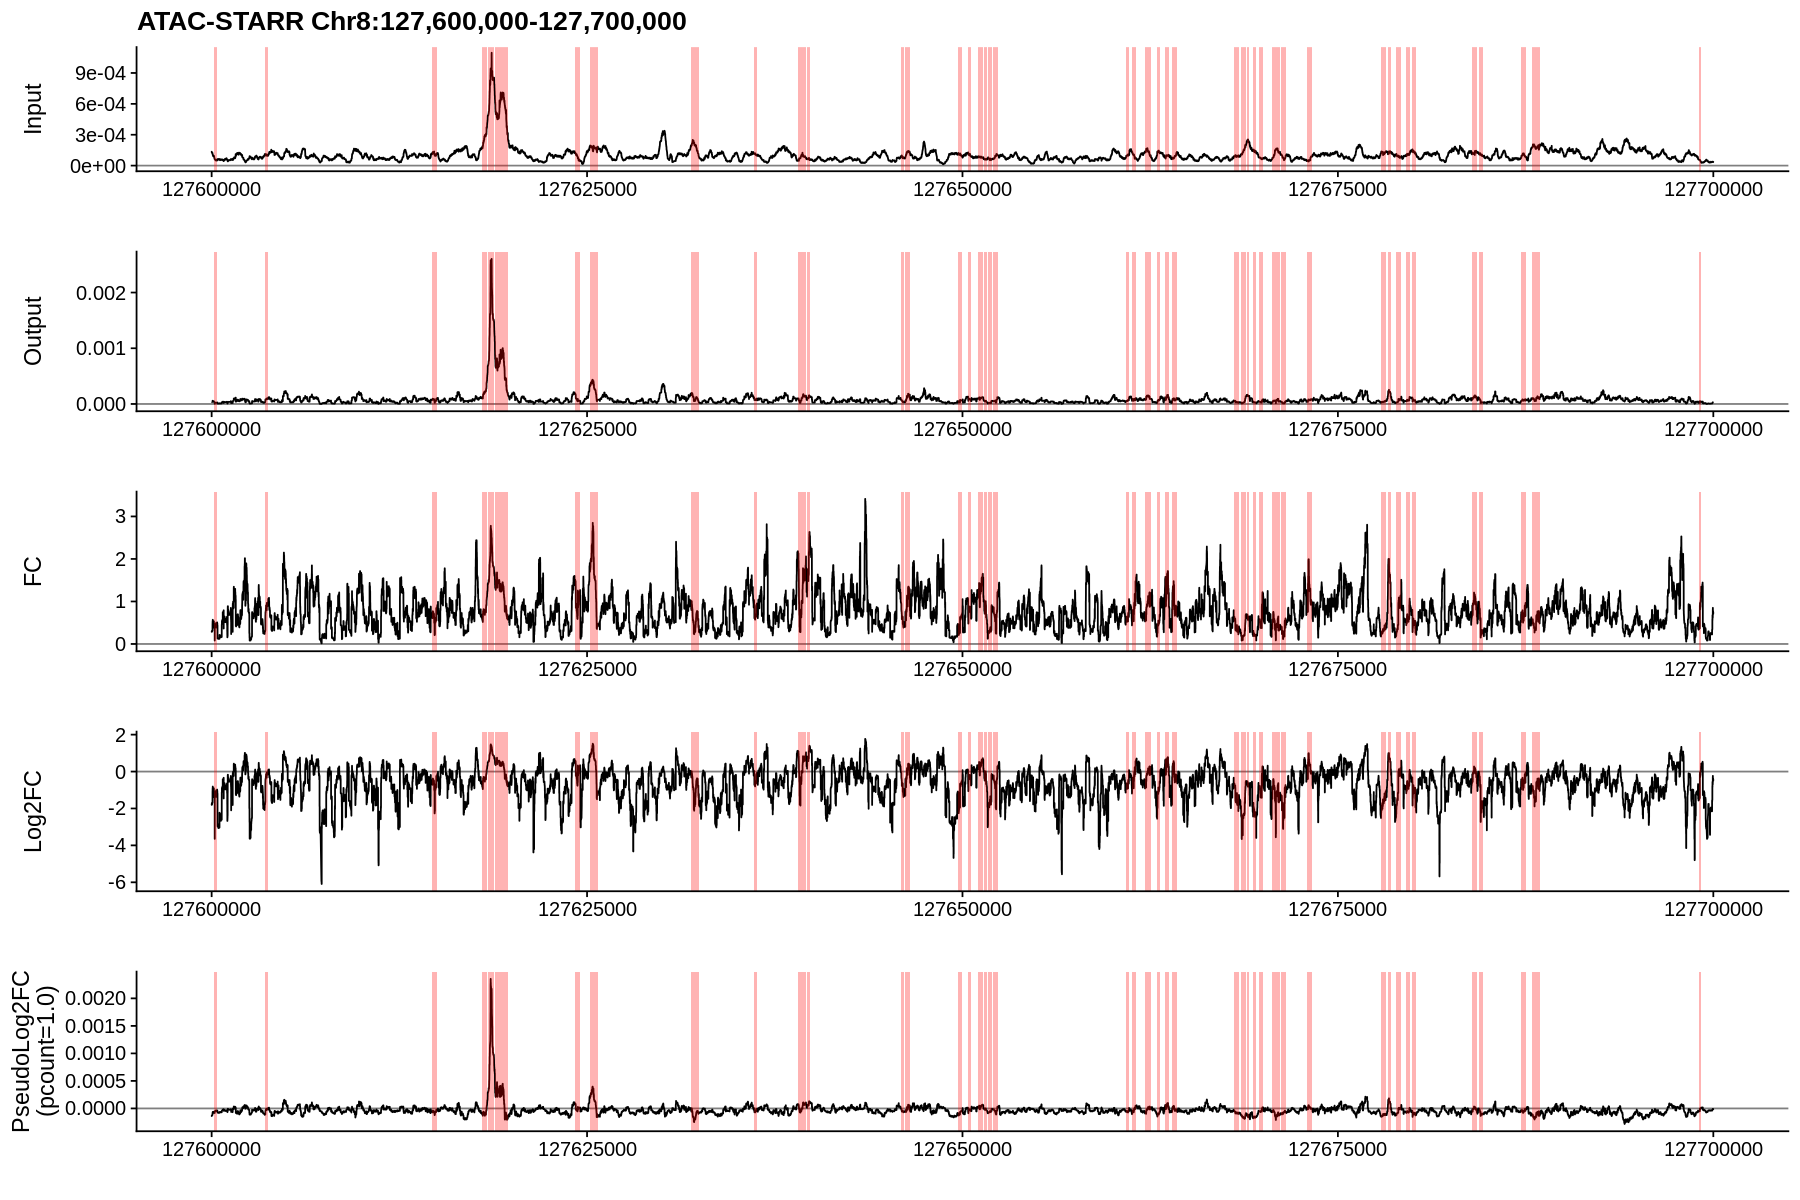

In [12]:
options(repr.plot.height=10, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [13]:
dat_cov = dat_cov_astarr
dat_lfc = dat_lfc_astarr
gp1 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=FC))
gp4 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=FC_Z))

lst = list(gp1, gp2, gp3, gp4)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = "red",
            alpha=0.3) +
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

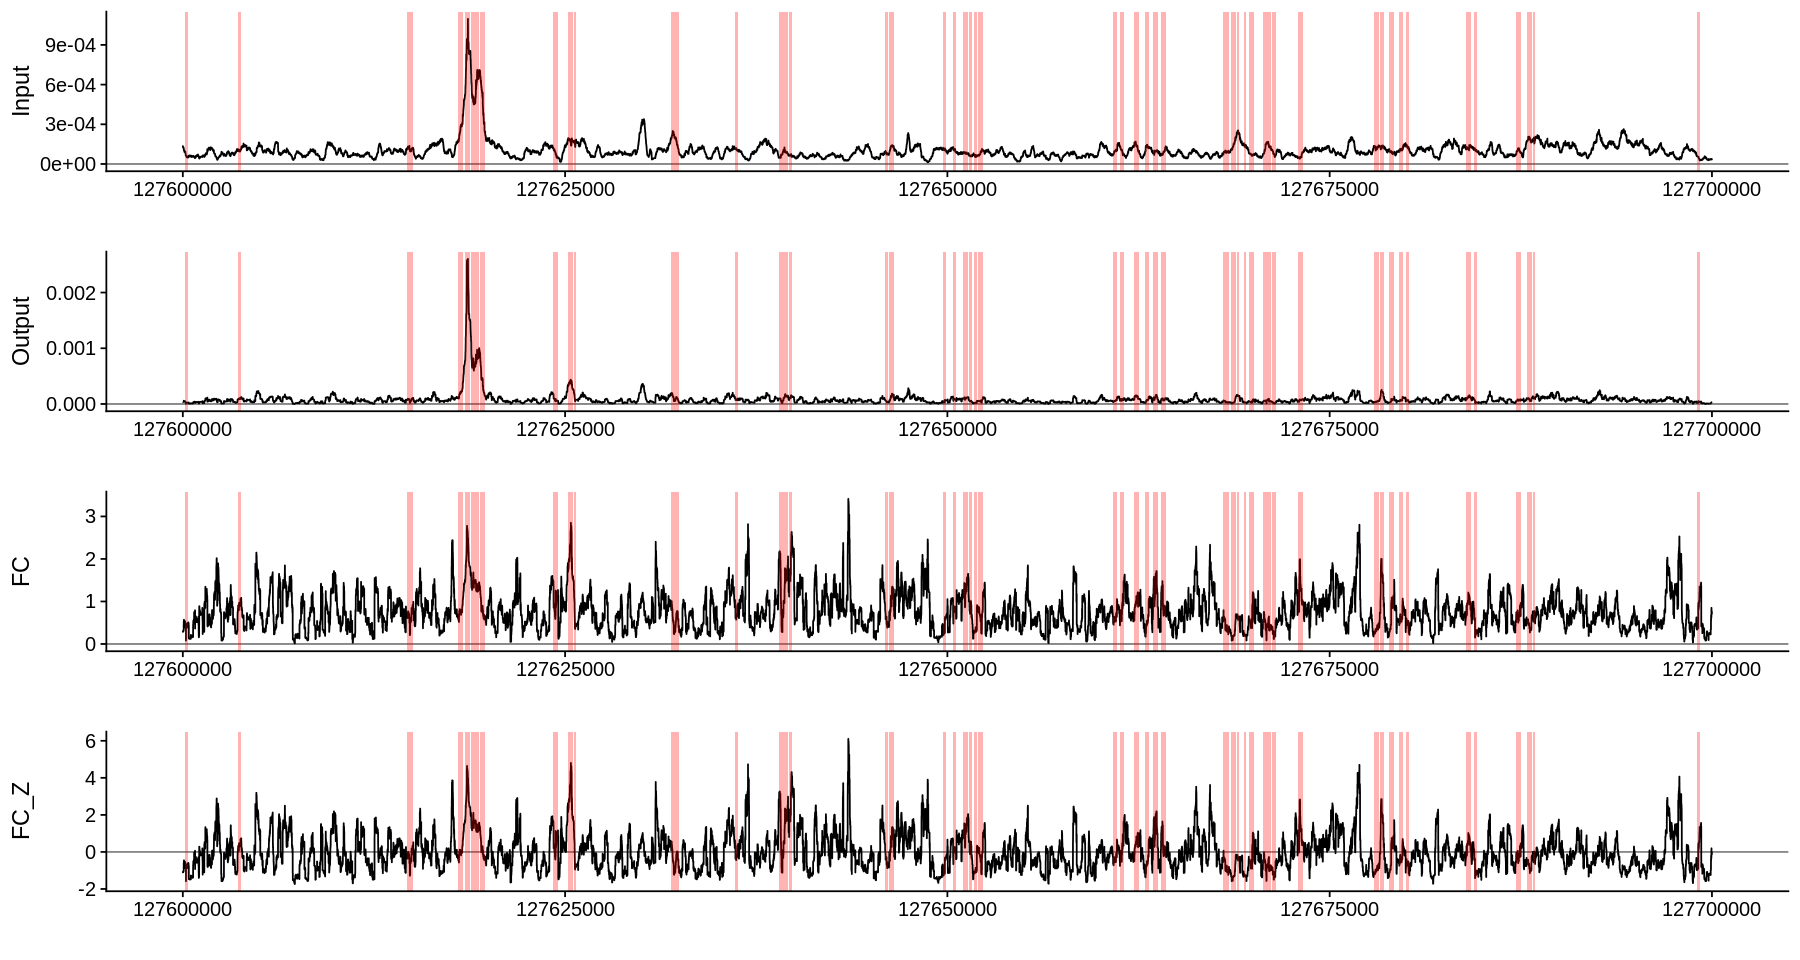

In [14]:
options(repr.plot.height=8, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [15]:
dat_lfc = dat_lfc_astarr
gp1 = ggplot(dat_lfc, aes(x=Start, y=Log2FC))
gp2 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_10neg5))
gp3 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_10neg4))
gp4 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_10neg3))
gp5 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_10neg2))
gp6 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_10neg1))
gp7 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_add01))
gp8 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_add10))

lst = list(gp1, gp2, gp3, gp4, gp5, gp6, gp7, gp8)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        theme_cowplot()
    return(gpt)
})

txt = "pLog2FC = log2( (Output + cnt) / (Input + cnt) )"
lst[[1]] = lst[[1]] + labs(x="", y="", title="Log2FC")
lst[[2]] = lst[[2]] + labs(x="", y="", title="pseudoLog2FC (10^-5)")
lst[[3]] = lst[[3]] + labs(x="", y="", title="pseudoLog2FC (10^-4)")
lst[[4]] = lst[[4]] + labs(x="", y="", title="pseudoLog2FC (10^-3)")
lst[[5]] = lst[[5]] + labs(x="", y="", title="pseudoLog2FC (10^-2)")
lst[[6]] = lst[[6]] + labs(x="", y="", title="pseudoLog2FC (10^-1)")
lst[[7]] = lst[[7]] + labs(x="", y="", title="pseudoLog2FC (10^+0 =  1)")
lst[[8]] = lst[[8]] + labs(x="", y="", title="pseudoLog2FC (10^+1 = 10)")

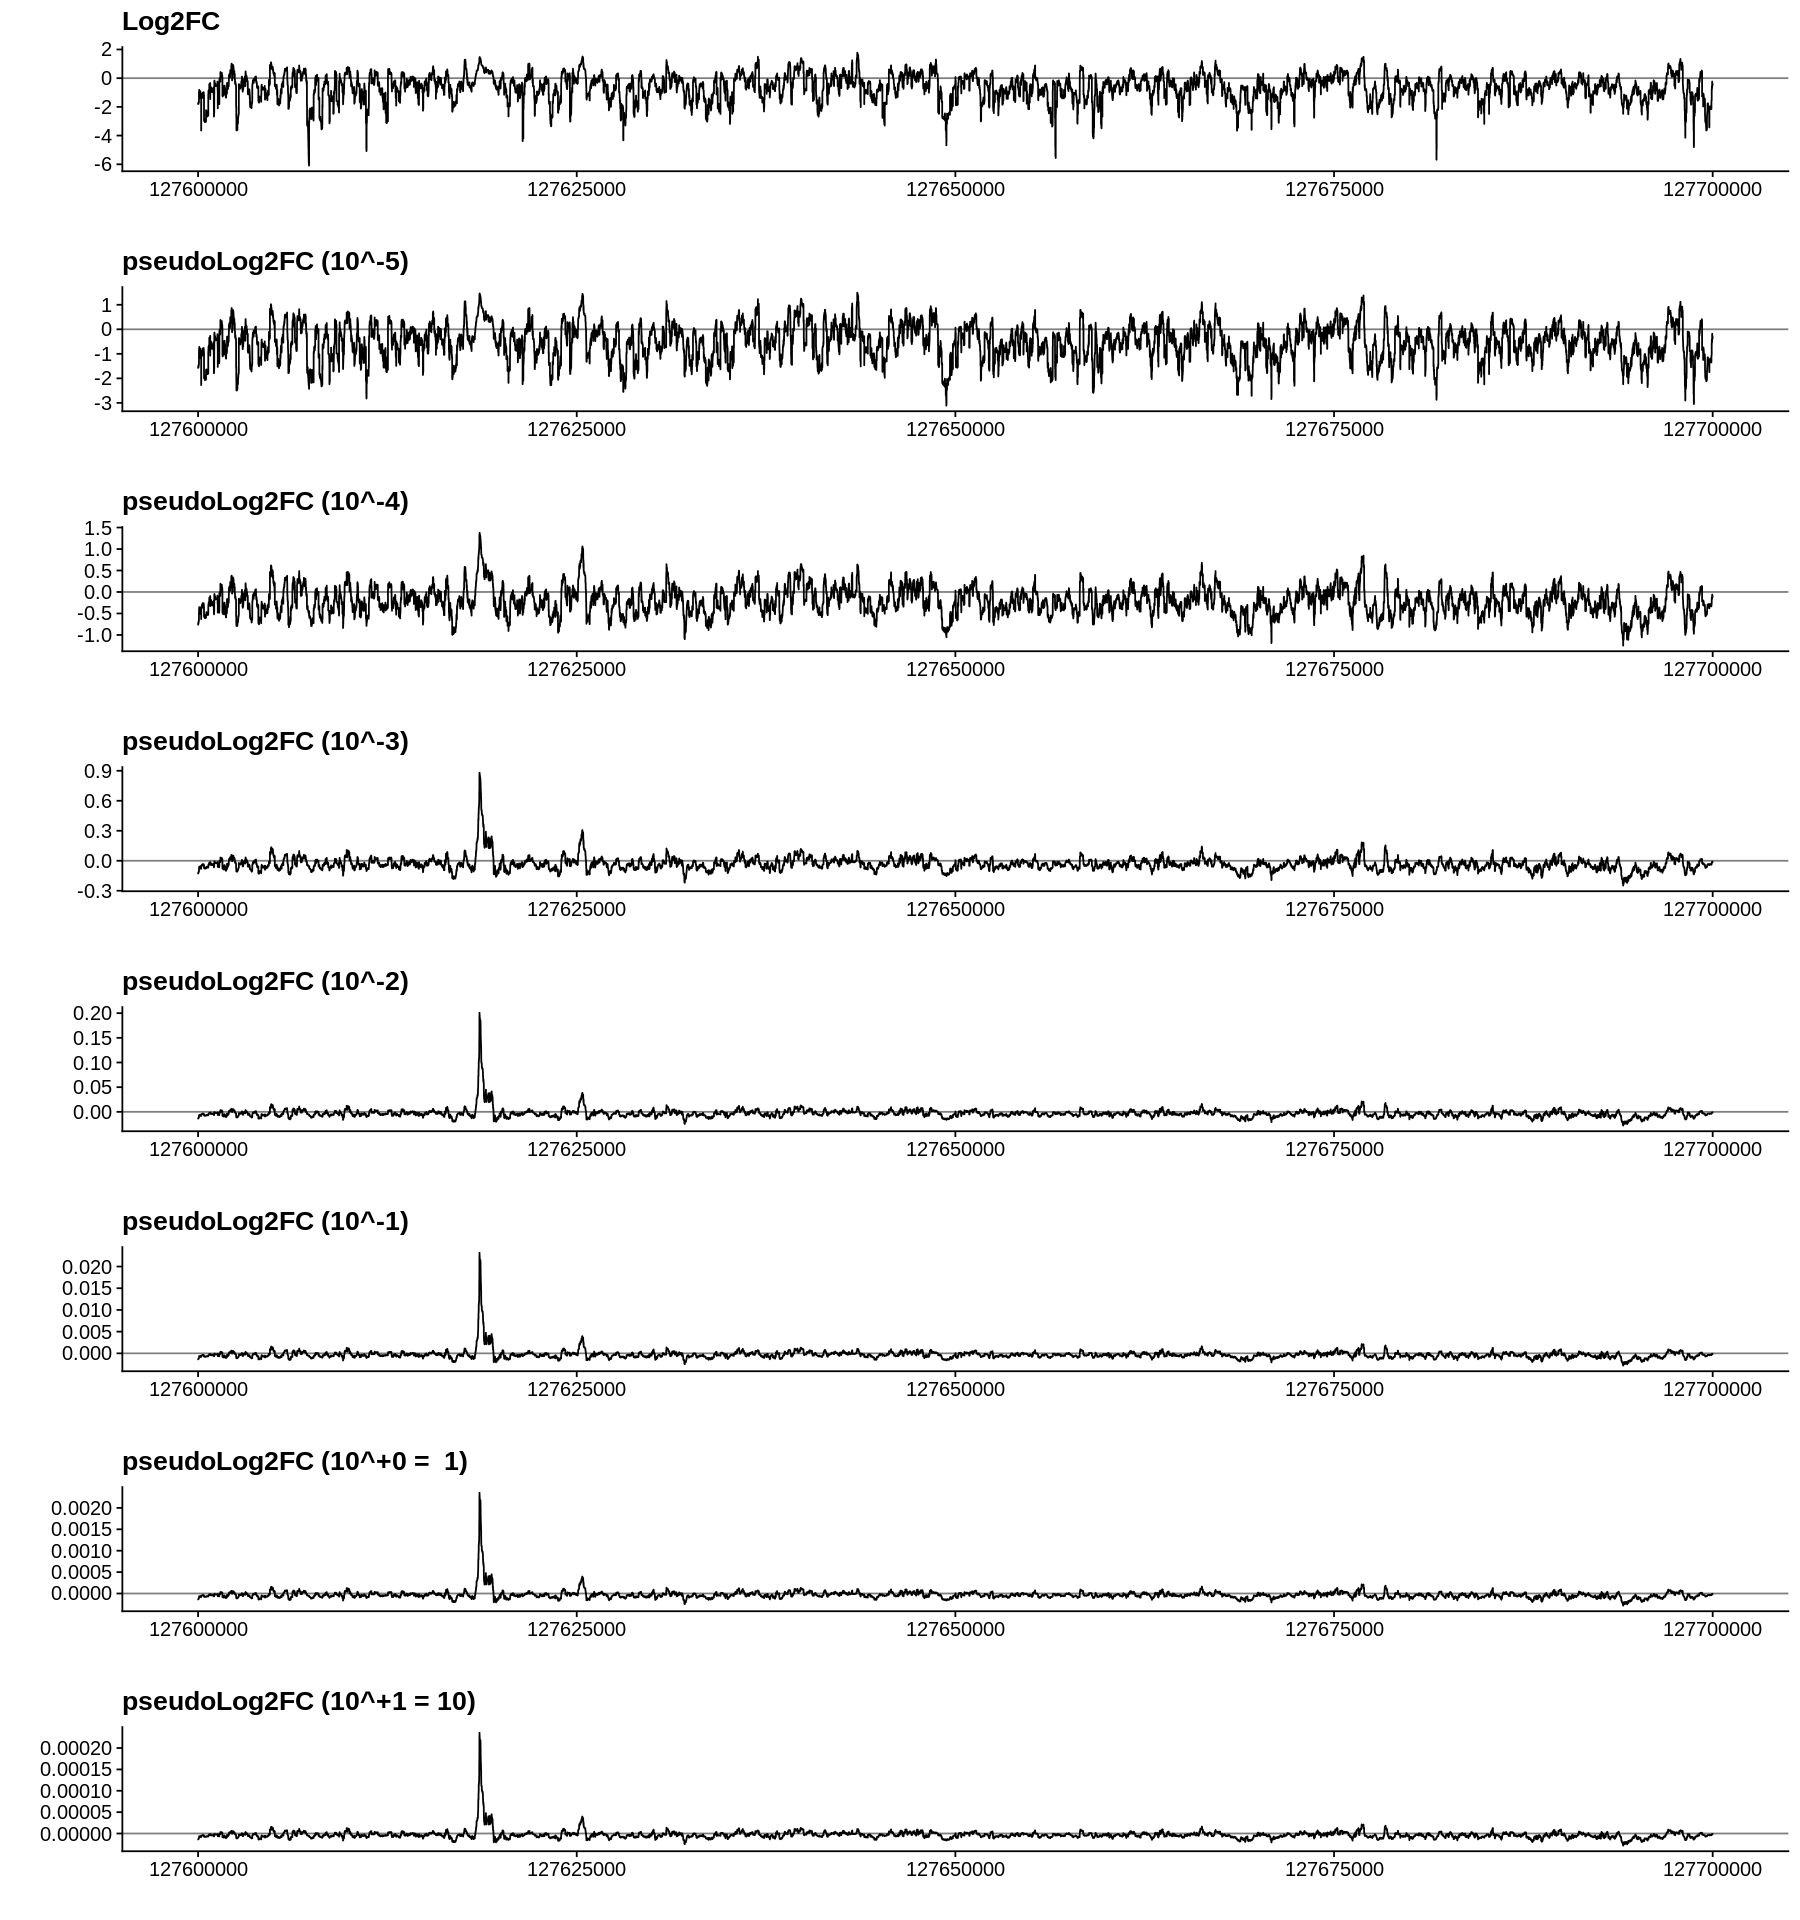

In [16]:
options(repr.plot.height=16, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

## Plot TMPRA

In [17]:
start  = 127600000
end    = 127700000

dat = dat_tmpra_myc
dat = dat %>%
    dplyr::filter(Start >= start, Start <= end) %>%
    mutate(
        Log2FC = log2(FC),
        pLog2FC_1e2 = log2((Output+  10^+2) / (Input+  10^+2)),
        pLog2FC_5e2 = log2((Output+5*10^+2) / (Input+5*10^+2)),
        pLog2FC_1e3 = log2((Output+  10^+3) / (Input+  10^+3)),
        pLog2FC_1e4 = log2((Output+  10^+4) / (Input+  10^+4)),
        pLog2FC_1e5 = log2((Output+  10^+5) / (Input+  10^+5))
    )

###
dat$FC_Z = (dat$FC - mean(dat$FC)) / sd(dat$FC)

### show table
dat_cov_tmpra = dat
print(dim(dat))
head(dat)

[1] 100001     13


Chrom,Start,End,Input,Output,FC,Log2FC,pLog2FC_1e2,pLog2FC_5e2,pLog2FC_1e3,pLog2FC_1e4,pLog2FC_1e5,FC_Z
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr8,127600000,127600001,401,340,0.8478803,-0.2380675,-0.1873071,-0.10113778,-0.06422396,-0.008486057,-0.0008767955,-0.319164
chr8,127600001,127600002,456,401,0.8793860,-0.1854316,-0.1502743,-0.08548351,-0.05555340,-0.007608804,-0.0007900967,-0.307253
chr8,127600002,127600003,456,401,0.8793860,-0.1854316,-0.1502743,-0.08548351,-0.05555340,-0.007608804,-0.0007900967,-0.307253
chr8,127600003,127600004,456,401,0.8793860,-0.1854316,-0.1502743,-0.08548351,-0.05555340,-0.007608804,-0.0007900967,-0.307253
chr8,127600004,127600005,456,401,0.8793860,-0.1854316,-0.1502743,-0.08548351,-0.05555340,-0.007608804,-0.0007900967,-0.307253
chr8,127600005,127600006,456,401,0.8793860,-0.1854316,-0.1502743,-0.08548351,-0.05555340,-0.007608804,-0.0007900967,-0.307253


In [18]:
dat = dat_cov_tmpra
gp1 = ggplot() + geom_line(data=dat, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat, aes(x=Start, y=FC))
gp4 = ggplot() + geom_line(data=dat, aes(x=Start, y=Log2FC))
gp5 = ggplot() + geom_line(data=dat, aes(x=Start, y=pLog2FC_1e4))

lst = list(gp1, gp2, gp3, gp4, gp5)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = "red",
            alpha=0.3) +
        labs(x="") +
        theme_cowplot() 
    return(gpt)
})

lst[[1]] = lst[[1]] + labs(title="Tiling MPRA Chr8:127,600,000-127,700,000")
lst[[5]] = lst[[5]] + labs(y = "PseudoLog2FC\n(pcount=10,000)")

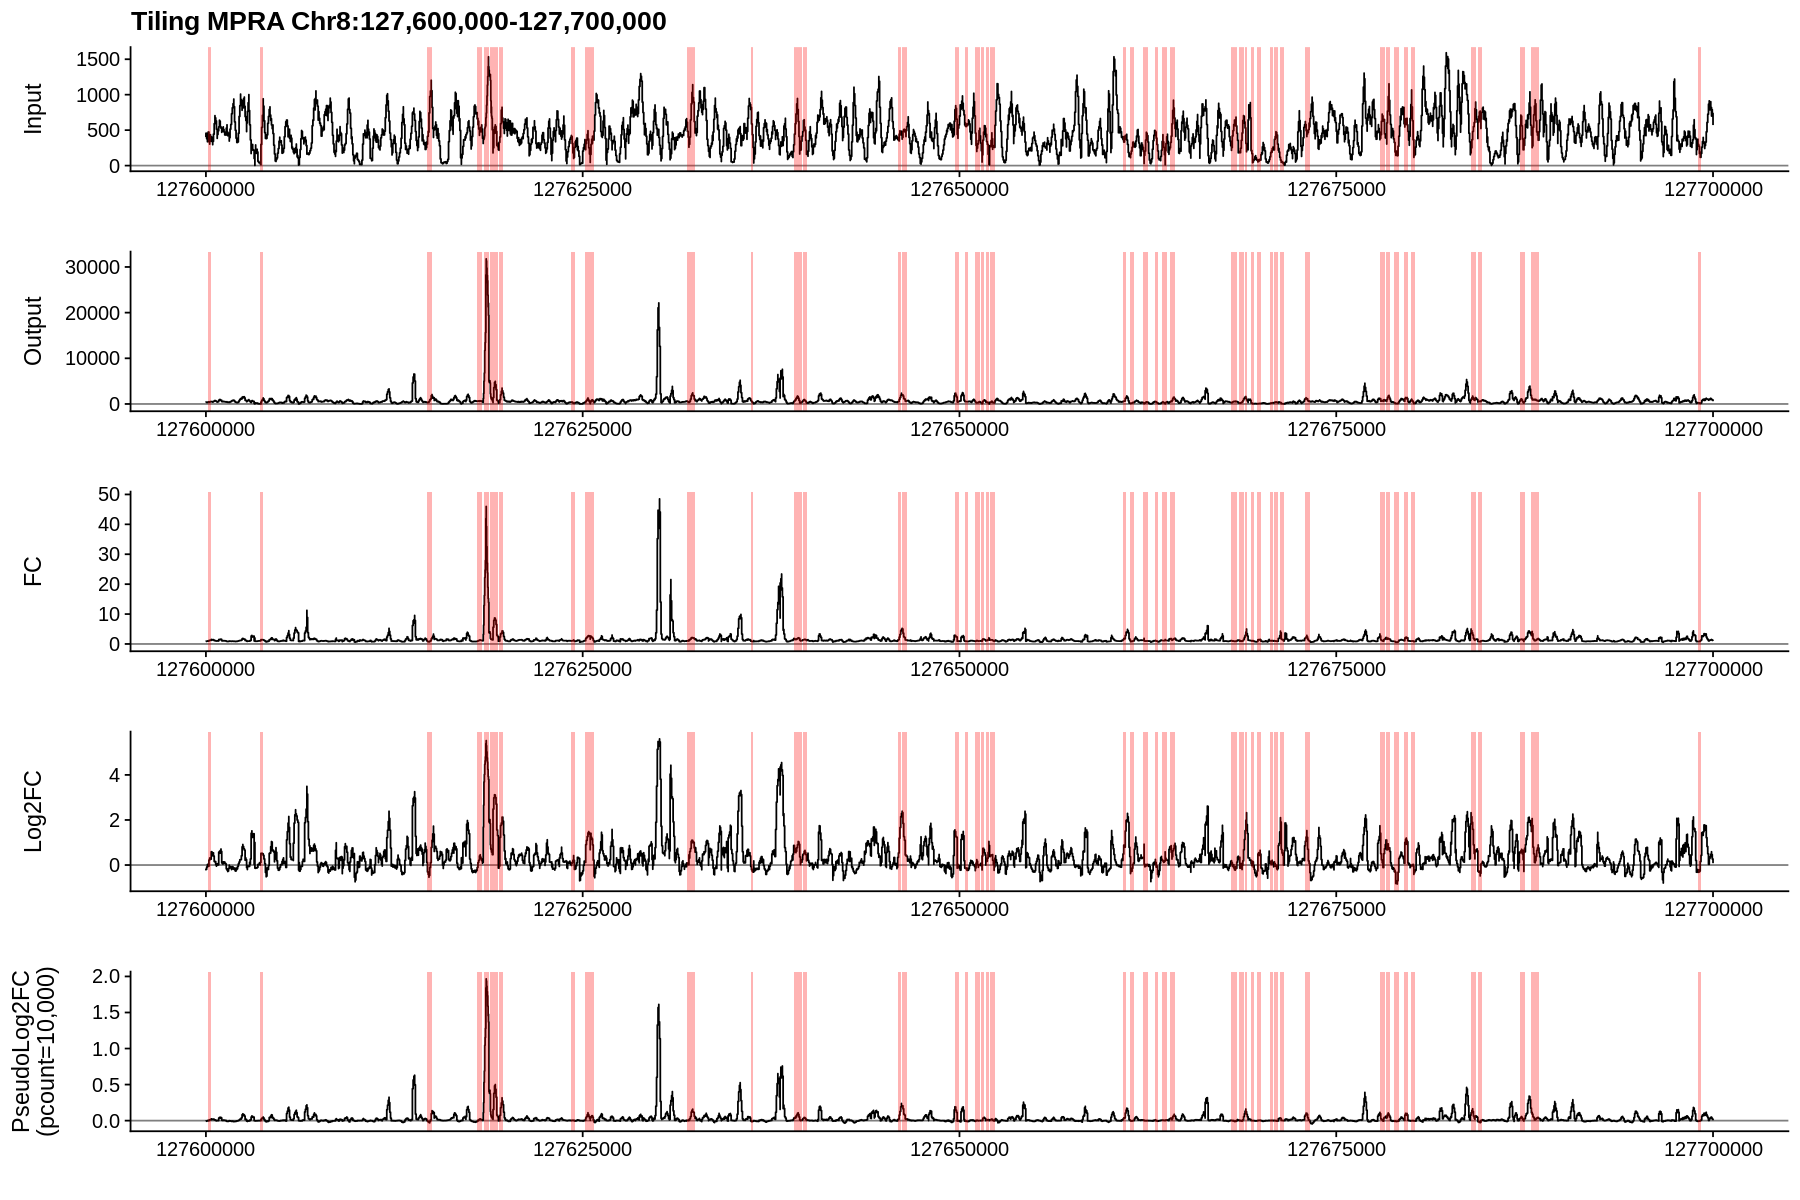

In [19]:
options(repr.plot.height=10, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [20]:
dat_cov = dat_cov_tmpra
gp1 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=FC))
gp4 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=FC_Z))

lst = list(gp1, gp2, gp3, gp4)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = "red",
            alpha=0.3) +
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

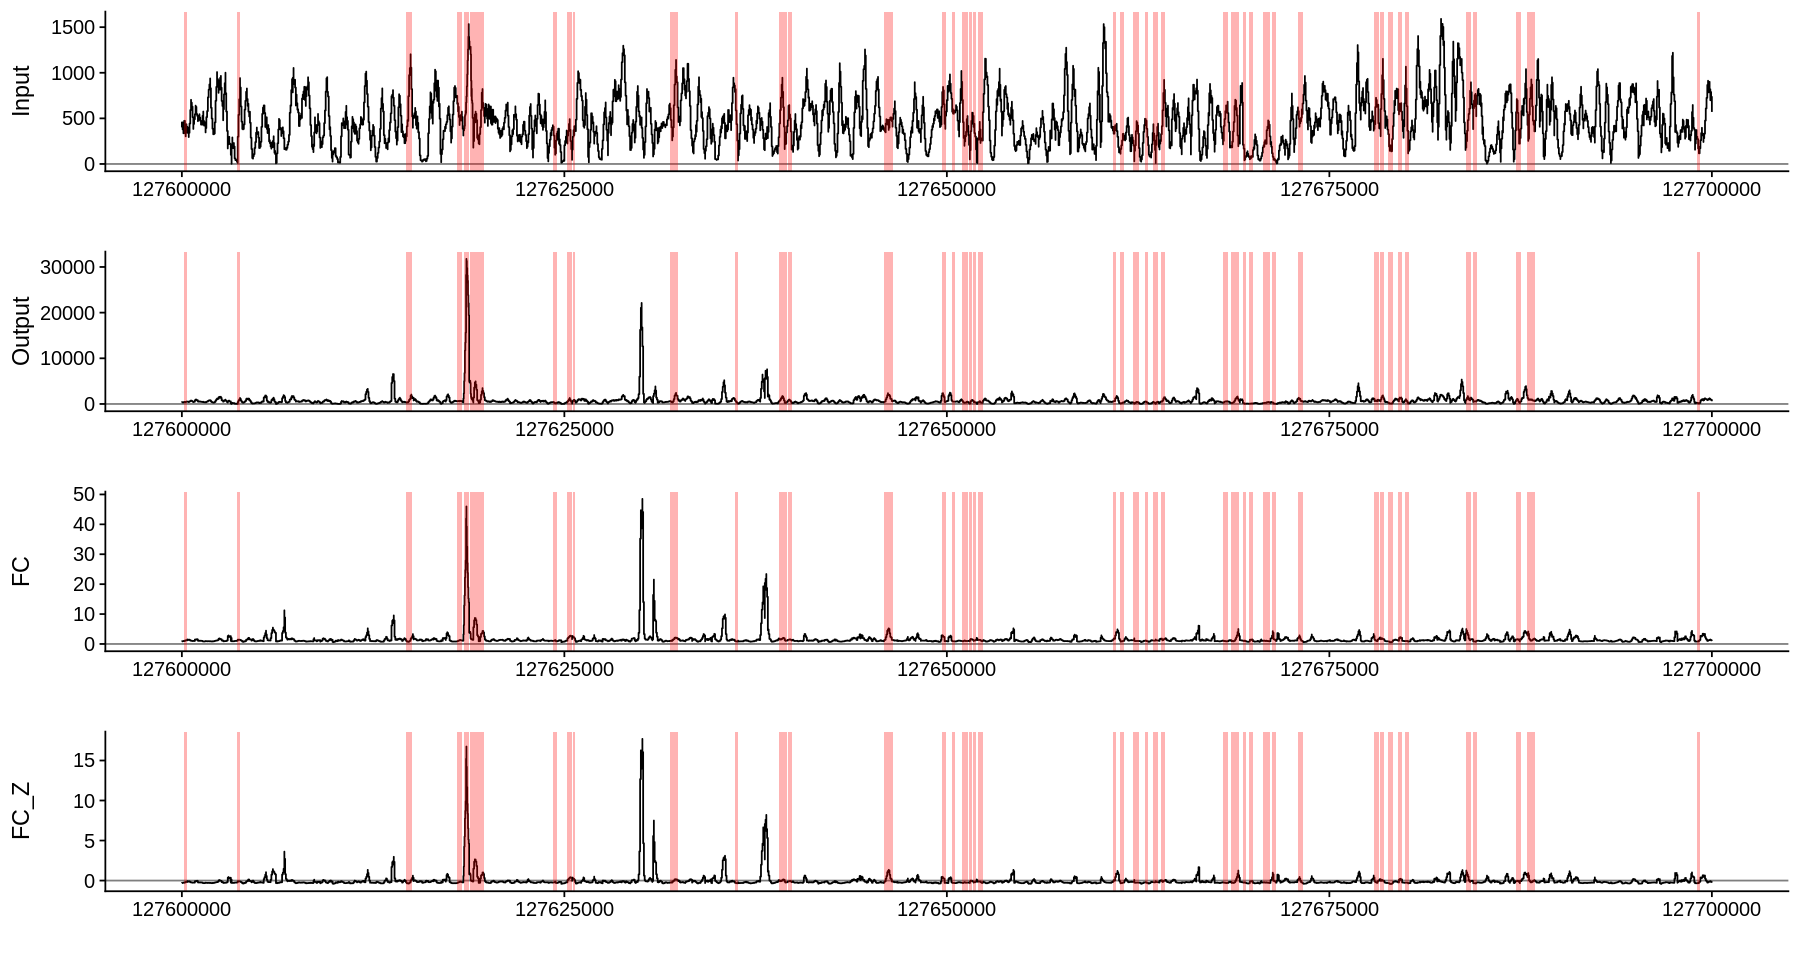

In [21]:
options(repr.plot.height=8, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [22]:
dat = dat_cov_tmpra
gp1 = ggplot(dat, aes(x=Start, y=Log2FC))
gp2 = ggplot(dat, aes(x=Start, y=pLog2FC_1e2))
gp3 = ggplot(dat, aes(x=Start, y=pLog2FC_5e2))
gp4 = ggplot(dat, aes(x=Start, y=pLog2FC_1e3))
gp5 = ggplot(dat, aes(x=Start, y=pLog2FC_1e4))
gp6 = ggplot(dat, aes(x=Start, y=pLog2FC_1e5))

lst = list(gp1, gp2, gp3, gp4, gp5, gp6)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        theme_cowplot()
    return(gpt)
})

txt = "pLog2FC = log2( (Output + cnt) / (Input + cnt) )"
lst[[1]] = lst[[1]] + labs(x="", y="", title="Log2FC")
lst[[2]] = lst[[2]] + labs(x="", y="", title="pseudoLog2FC:     100")
lst[[3]] = lst[[3]] + labs(x="", y="", title="pseudoLog2FC:     500")
lst[[4]] = lst[[4]] + labs(x="", y="", title="pseudoLog2FC:   1,000")
lst[[5]] = lst[[5]] + labs(x="", y="", title="pseudoLog2FC:  10,000")
lst[[6]] = lst[[6]] + labs(x="", y="", title="pseudoLog2FC: 100,000")

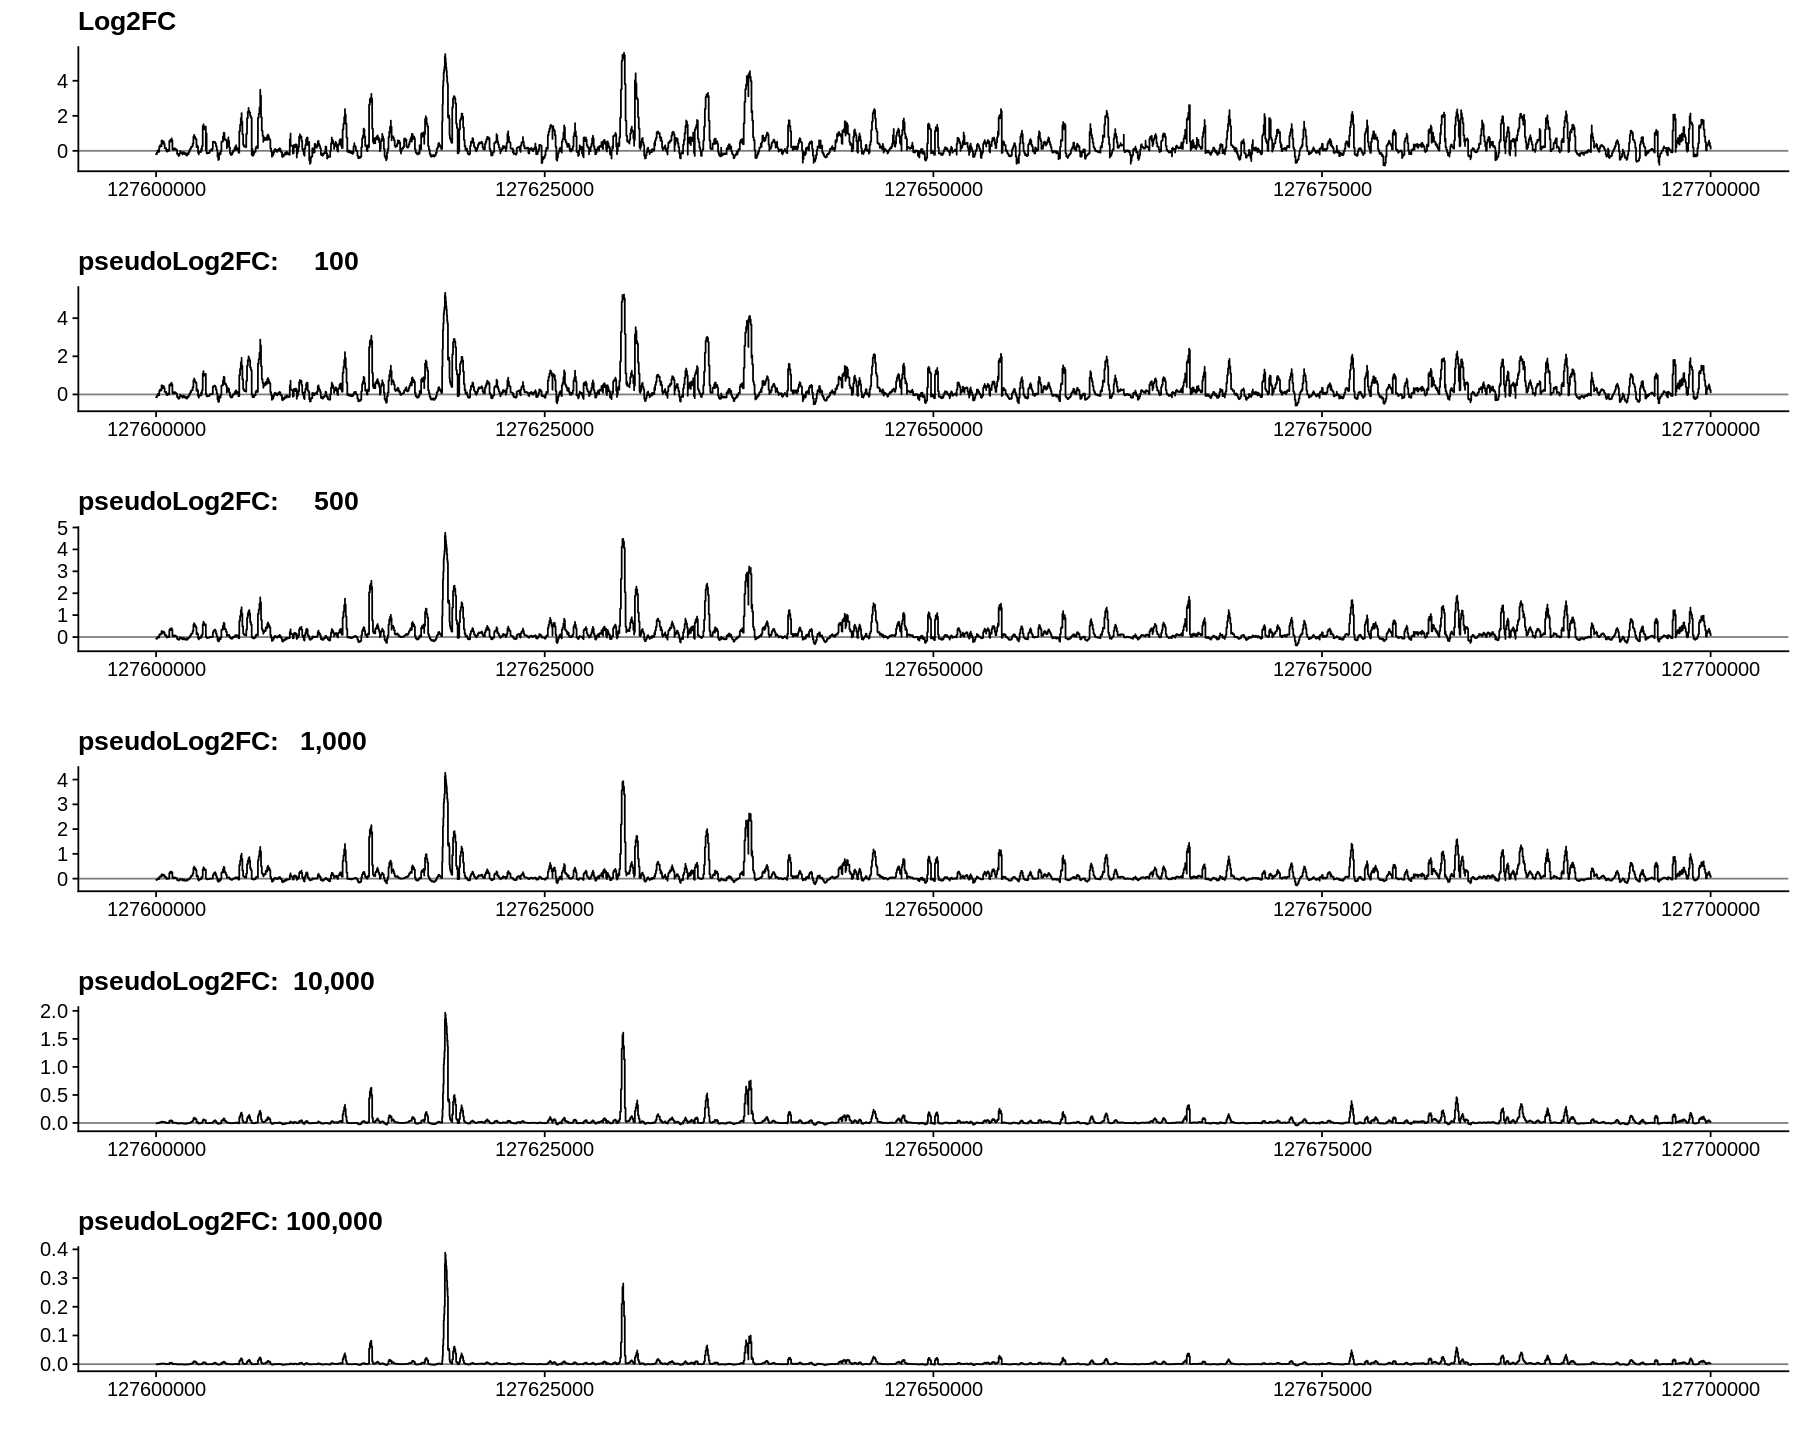

In [23]:
options(repr.plot.height=12, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [24]:
mean(dat$Input)

[1] 463.5589